In [3]:
import numpy as np
import pandas as pd

In [1]:
import pickle

routes = pickle.load( open( "save2.p", "rb" ) )

In [4]:
%%time
xstack = np.hstack(routes.x_bin.to_list())
ystack = np.hstack(routes.y_bin.to_list())

Wall time: 2.31 s


In [5]:
xstack_df = pd.DataFrame(xstack, columns = ['coordinate'])
ystack_df = pd.DataFrame(ystack, columns = ['coordinate'])

In [8]:
x_value_counts = pd.DataFrame(xstack_df['coordinate'].value_counts())

In [9]:
y_value_counts = pd.DataFrame(ystack_df['coordinate'].value_counts())

# Restrict Bins

In [106]:
tresh = 30000

x_restrict = x_value_counts[x_value_counts.coordinate > tresh].index
y_restrict = y_value_counts[y_value_counts.coordinate > tresh].index

In [169]:
#number of bins initially considered, will restrict further below
len(x_restrict)+len(y_restrict)

1270

In [109]:
df = routes[['duration', 'x_bin', 'y_bin']]

In [110]:
def coor_map(array, coordinate):
    return int(coordinate in array)

In [ ]:
for coordinate in x_restrict:
    df['x_' + str(coordinate)] = df['x_bin'].apply(coor_map, coordinate = coordinate)
    
for coordinate in y_restrict:
    df['y_' + str(coordinate)] = df['y_bin'].apply(coor_map, coordinate = coordinate)

In [ ]:
y = df['duration']
#take 1000 most traveled grid locations (mostly a time concern)
X = df.iloc[:,3:1000]

#take a sample of trips
X_train = X.iloc[:100000]
y_train = y.iloc[:100000]

In [149]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.613032198537929

In [191]:
y_pred = reg.predict(X_train)

In [197]:
len(y_pred)

100000

In [220]:
pd.concat([y.head(), X.head()], axis = 1)

,duration,x_480648,x_480993,x_480709,x_480734,x_480743,x_480984,x_480752,x_480726,x_481079,...,y_314985,y_315237,y_314802,y_314839,y_314979,y_314984,y_314892,y_314713,y_314760,y_315004
0,5.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,10.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bins that significantly increase trip duration

In [154]:
coef_df = pd.DataFrame(zip(reg.coef_, X.columns), columns = ['coef', 'bin'])

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt

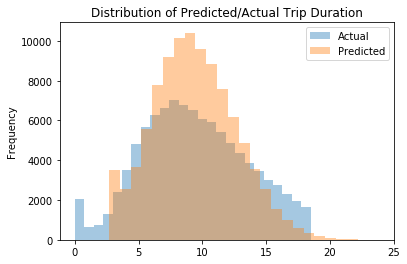

In [222]:
alpha = .4
bin_num = 25
y_train.plot(kind = 'hist', label = 'Actual', alpha = alpha, bins = bin_num)
plt.hist(y_pred, label = 'Predicted', alpha = alpha, bins = bin_num)
plt.title('Distribution of Predicted/Actual Trip Duration')
plt.legend()
plt.savefig('duration.png', dpi = 500)
plt.show()

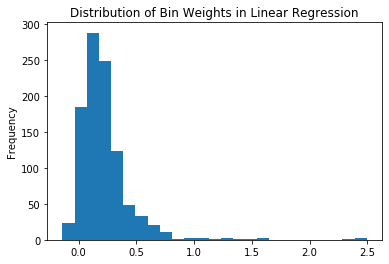

In [223]:
coef_df['coef'].plot(kind = 'hist', bins = bin_num)
plt.title("Distribution of Bin Weights in Linear Regression")
plt.savefig('weights.png', dpi = 500)
plt.show()

In [229]:
coef_df[coef_df.coef >  .5]

,coef,bin
220,0.640921,x_481630
241,0.647587,x_481622
303,0.700338,x_482101
317,0.654878,x_481639
333,0.609584,x_481578
...,...,...
984,0.640267,y_315324
986,0.681915,y_314784
989,0.554545,y_314802
994,0.648178,y_314713


In [225]:
coef_df[coef_df.coef >  1].sort_values(by = 'coef', ascending = False)

,coef,bin
850,2.496021,y_314465
897,2.412553,y_314467
849,2.307631,y_314466
892,1.597752,y_314643
940,1.546826,y_314635
901,1.473470,y_314636
956,1.359966,y_315436
972,1.304417,y_314674
967,1.291407,y_314637
974,1.237342,y_315437


In [166]:
coef_df[coef_df.coef >  2]

,coef,bin
849,2.307631,y_314466
850,2.496021,y_314465
897,2.412553,y_314467
